# Understanding recurrent neural networks

Numpy implementation of a simple RNN:

In [1]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)

## A recurrent layer in Keras

In [2]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
# return the full state sequence
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
# stack several RNN one after another, intermidiate layers must return full sequence of outputs
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True)) 
model.add(SimpleRNN(32, return_sequences=True)) 
model.add(SimpleRNN(32, return_sequences=True)) 
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Use RNN on IMDB:

In [2]:
# Preparing the IMDB data
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test_shape:', input_test.shape)

loading data...
25000 train sequences
25000 test sequences
Pad sequences (sample x time)
input_train shape: (25000, 500)
input_test_shape: (25000, 500)


In [6]:
# Training the model with Embedding and SimpleRNN layers
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 72s 456ms/step - loss: 0.6167 - acc: 0.6453 - val_loss: 0.4772 - val_acc: 0.7918
Epoch 2/10
157/157 [==============================] - 78s 499ms/step - loss: 0.4025 - acc: 0.8355 - val_loss: 0.3869 - val_acc: 0.8396
Epoch 3/10
157/157 [==============================] - 93s 590ms/step - loss: 0.2960 - acc: 0.8853 - val_loss: 0.4706 - val_acc: 0.8068
Epoch 4/10
157/157 [==============================] - 82s 522ms/step - loss: 0.2280 - acc: 0.9158 - val_loss: 0.3861 - val_acc: 0.8300
Epoch 5/10
157/157 [==============================] - 98s 624ms/step - loss: 0.1742 - acc: 0.9352 - val_loss: 0.3555 - val_acc: 0.8672
Epoch 6/10
157/157 [==============================] - 80s 509ms/step - loss: 0.1314 - acc: 0.9552 - val_loss: 0.4440 - val_acc: 0.8574
Epoch 7/10
157/157 [==============================] - 85s 539ms/step - loss: 0.0877 - acc: 0.9721 - val_loss: 0.6584 - val_acc: 0.7934
Epoch 8/10
157/157 [==============================] - 8

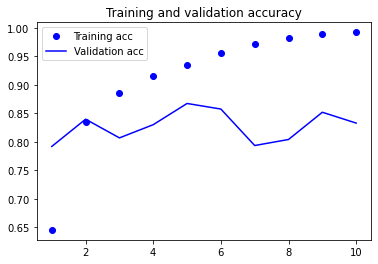

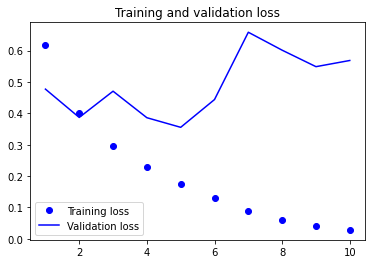

In [7]:
# Plotting results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## A concrete LSTM example in Keras

In [3]:
from keras.layers import LSTM, Dense, Embedding
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 12s 75ms/step - loss: 0.5070 - acc: 0.7572 - val_loss: 0.3871 - val_acc: 0.8308
Epoch 2/10
157/157 [==============================] - 11s 68ms/step - loss: 0.2982 - acc: 0.8850 - val_loss: 0.3080 - val_acc: 0.8822
Epoch 3/10
157/157 [==============================] - 11s 72ms/step - loss: 0.2299 - acc: 0.9146 - val_loss: 0.2800 - val_acc: 0.8822
Epoch 4/10
157/157 [==============================] - 11s 70ms/step - loss: 0.1999 - acc: 0.9278 - val_loss: 0.3688 - val_acc: 0.8658
Epoch 5/10
157/157 [==============================] - 10s 66ms/step - loss: 0.1771 - acc: 0.9362 - val_loss: 0.3219 - val_acc: 0.8776
Epoch 6/10
157/157 [==============================] - 11s 69ms/step - loss: 0.1585 - acc: 0.9428 - val_loss: 0.3144 - val_acc: 0.8860
Epoch 7/10
157/157 [==============================] - 11s 69ms/step - loss: 0.1394 - acc: 0.9508 - val_loss: 0.3512 - val_acc: 0.8848
Epoch 8/10
157/157 [==============================] - 11s 68ms

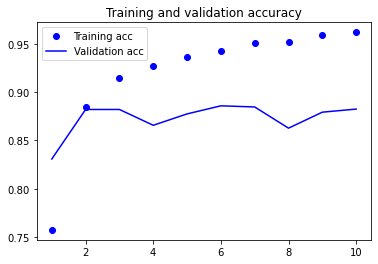

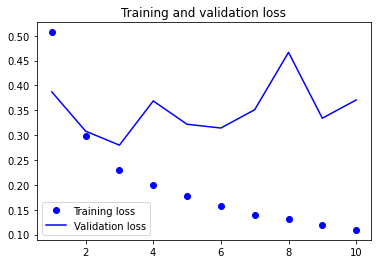

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()